<a href="https://colab.research.google.com/github/HimashiBal/Predicting-Shark-Habitats/blob/main/Copy_of_Shark_habitat_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Shark habitat clustering using K-means

# Import Libraries and acquire Data

In [ ]:
# Import libraries
import pandas as pd # Pandas is used for data manipulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load shark migration data that also has environment data
fp = r"/content/drive/MyDrive/Colab Notebooks/Shark_habitat_AMOC/Shortfin_Mako_Env_Data_ALL.csv"

In [ ]:
# Read data using varying amount of spaces as separator and specifying * characters as NoData values
# And don't worry about the warning message generated when running this cell
data = pd.read_csv(fp, na_values=["*", "**", "***", "****", "*****", "******"])

In [ ]:
data.shape

(25640, 11)

In [ ]:
#check for null or missing values
data.isna().sum()
data.isnull().sum()

Unnamed: 0                  0
shark                       0
timestamp                   0
longitude                   0
latitude                    0
argos_location_class        1
Unnamed: 5              25640
sst_C                      32
salinity                 6059
chlorophyll              1222
elevation                  13
dtype: int64

In [ ]:
# Keep only the first n rows
#data = data.head(12000)

In [ ]:
data.shape

(25640, 11)

In [ ]:
# Remove leading/trailing whitespaces from column names
data.columns = data.columns.str.strip()
# Drop unnecessary columns
data = data.drop(['Unnamed: 5', 'argos_location_class'], axis=1)

In [ ]:
# # How to print middle rows instead of the top by using head() or the bottom by using tail()
i = 1030
data.iloc[i:i+10]

,Unnamed: 0,shark,timestamp,longitude,latitude,sst_C,salinity,chlorophyll,elevation
1030,1030,1,2014-02-17 21:52:21,-86.6458,22.4526,26.066116,36.667630,0.238277,1247.0
1031,1031,1,2014-02-18 4:44:31,-86.8191,22.5205,26.066116,36.342945,0.227161,1259.0
1032,1032,1,2014-02-18 10:56:10,-86.8425,22.4608,26.066116,36.814500,0.219333,784.0
1033,1033,1,2014-02-18 12:39:32,-86.7865,22.4283,26.066116,36.814500,0.248161,976.0
1034,1034,1,2014-02-18 14:56:32,-86.6680,22.4041,26.066116,36.667630,0.265201,1485.0
1035,1035,1,2014-02-18 16:32:12,-86.6467,22.4072,26.066116,36.667630,0.265994,1016.0
1036,1036,1,2014-02-18 18:14:06,-86.6709,22.3771,26.066116,36.667630,0.265201,1280.0
1037,1037,1,2014-02-18 21:38:33,-86.6545,22.3647,26.066116,36.667630,0.252723,977.0
1038,1038,1,2014-02-18 23:14:05,-86.7098,22.3830,26.066116,36.667630,0.265631,1456.0
1039,1039,1,2014-02-18 23:14:48,-86.6775,22.3850,26.066116,36.667630,0.265201,1669.0


In [ ]:
print(f'The DataFrame has {len(data)} rows.')

The DataFrame has 25640 rows.


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print(f'The DataFrame has {len(data)} rows.')

The DataFrame has 25640 rows.


In [ ]:
data.tail(20)

,Unnamed: 0,shark,timestamp,longitude,latitude,sst_C,salinity,chlorophyll,elevation
25620,25620,26,2015-08-20 10:36:00,-70.77541,41.16578,21.920557,NaN,1.302131,1480.0
25621,25621,26,2015-08-20 23:55:00,-70.75665,41.14360,21.920557,NaN,1.302131,1405.0
25622,25622,26,2015-08-21 9:52:00,-70.75546,41.18341,21.920557,NaN,1.317873,1523.0
25623,25623,26,2015-08-21 17:23:00,-70.81367,41.21386,21.920557,NaN,1.303898,1320.0
25624,25624,26,2015-08-22 10:31:00,-70.83440,41.27213,21.920557,NaN,1.558630,1551.0
25625,25625,26,2015-08-22 21:06:00,-70.71771,41.19675,21.920557,NaN,1.351010,1521.0
25626,25626,26,2015-08-22 21:47:00,-70.68027,41.19973,21.920557,NaN,1.426356,1536.0
25627,25627,26,2015-08-22 21:50:00,-70.67528,41.20108,21.920557,NaN,1.426356,1555.0
25628,25628,26,2015-08-23 0:47:00,-70.64884,41.21123,21.920557,NaN,1.433927,1564.0
25629,25629,26,2015-08-23 1:43:00,-70.64064,41.21445,21.920557,NaN,1.433927,1547.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25640 entries, 0 to 25639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   25640 non-null  int64  
 1   shark        25640 non-null  int64  
 2   timestamp    25640 non-null  object 
 3   longitude    25640 non-null  float64
 4   latitude     25640 non-null  float64
 5   sst_C        25608 non-null  float64
 6   salinity     19581 non-null  float64
 7   chlorophyll  24418 non-null  float64
 8   elevation    25627 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.0+ MB


In [ ]:
data.columns

Index(['Unnamed: 0', 'shark', 'timestamp', 'longitude', 'latitude', 'sst_C',
       'salinity', 'chlorophyll', 'elevation'],
      dtype='object')

In [ ]:
print("The shape of data is", data.shape)

The shape of data is (25640, 9)


In [ ]:
# Find the number of unique sharks in the input data:
num_sharks = data['shark'].nunique()
num_sharks

26

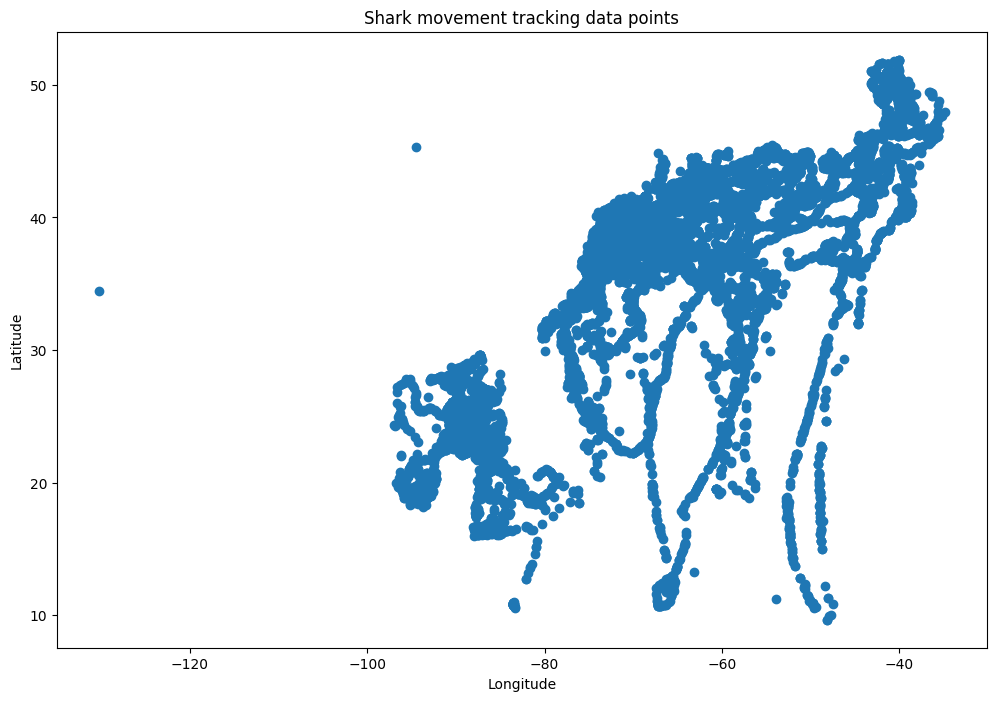

In [ ]:
# Scatter plot of habitats
plt.figure(figsize=(12, 8))
plt.scatter(data['longitude'],data['latitude'])
plt.title('Shark movement tracking data points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

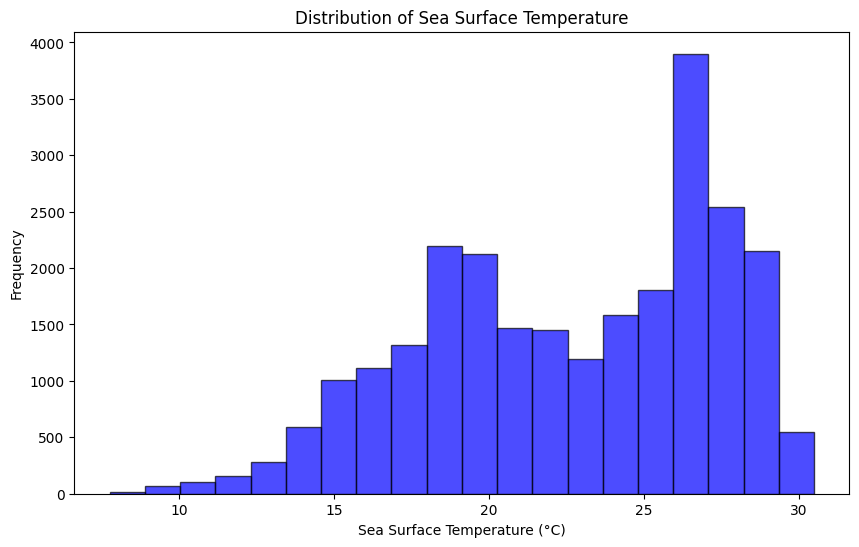

In [ ]:
# Plot the distribution of Sea Surface Temperature

plt.figure(figsize=(10, 6))

# Plot the histogram of 'sst_C' values
plt.hist(data['sst_C'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Sea Surface Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Sea Surface Temperature')

# Show the plot
plt.show()

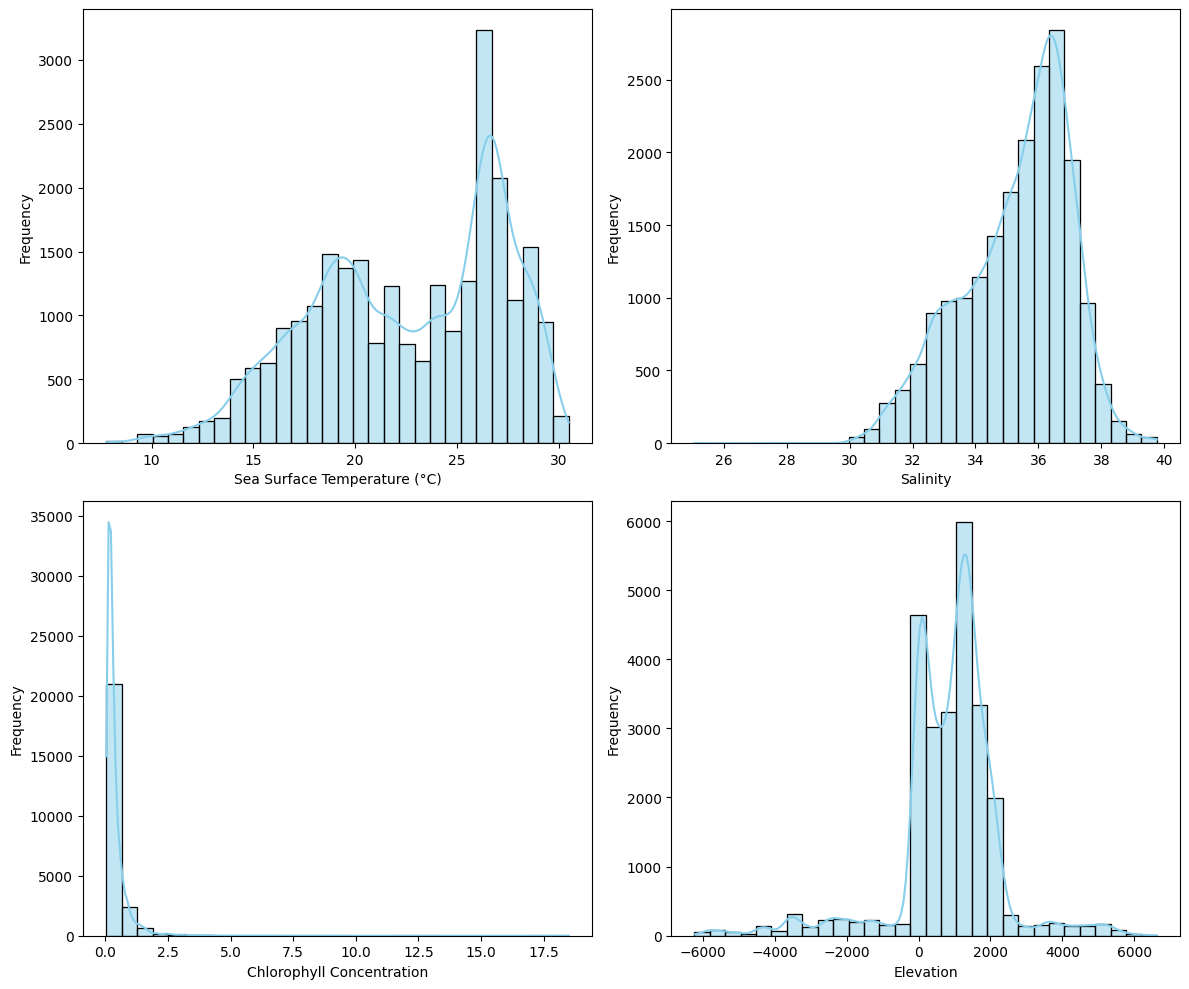

In [ ]:
# Plot the distribution of sea surface temperature, salinity, chlorophyll, elevation, etc.

# Select the columns for plotting
columns_to_plot = ['sst_C', 'salinity', 'chlorophyll', 'elevation']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Customize x-labels for each subplot
x_labels = {'sst_C': 'Sea Surface Temperature (°C)',
            'salinity': 'Salinity',
            'chlorophyll': 'Chlorophyll Concentration',
            'elevation': 'Elevation'}

# Plot each variable
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column].dropna(), kde=True, ax=axes[i], color='skyblue', bins=30)  # Use seaborn for improved aesthetics
    axes[i].set_xlabel(x_labels[column])
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#Find the Optimal Value of K using the Elbow Method


In [ ]:
# create an empty list for store residuals
wcss = []

for i in range(1,25):
    # create an object of K-Means class
    km = KMeans(n_clusters=i)
    # pass the dataframe to fit the algorithm
    km.fit_predict(data[['longitude','latitude']])
    # append inertia value to wcss list
    wcss.append(km.inertia_)

In [ ]:
# Plot of WCSS vs. K to check the optimal value of K
plt.plot(range(1,25),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

# Generate Clusters

In [ ]:
# K-means clustering using Scikit-Learn

# Statically define the number of clusters:
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters)

# Fit the data in the cluster:
y_means = kmeans.fit(data[['longitude','latitude']])

In [ ]:
# Find the clusters center
kmeans.cluster_centers_

In [ ]:
cluster_labels = kmeans.labels_
data['cluster'] = cluster_labels

print(cluster_labels)

# print with the label
data.head(10)

In [ ]:
data.tail(10)

# Visualize Clusters

In [ ]:
plt.figure(figsize=(12,8))
#plt.subplot(1,2,1)
plt.scatter(data['longitude'], data['latitude'])
plt.title('Shark Habitat Clusters (k-means)')

plt.grid(True)
i = 0
for center in kmeans.cluster_centers_:
    i += 1
    marker = '$' + str(i) + '$'
    center = center[:2]
    plt.scatter(center[0],center[1],marker = marker, c = 'red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [ ]:
# visualization
sns.set(style='whitegrid')
plt.figure(figsize=(16,7))

plt.title('Shark Habitat Clusters (k-means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sns.scatterplot(x="longitude", y="latitude", hue=data['cluster'], palette=sns.color_palette("hls",15), data=data, legend="full")

i = 0
for center in kmeans.cluster_centers_:
    marker = '$' + str(i) + '$'
    center = center[:2]
    plt.scatter(center[0],center[1],marker = marker, s = 20**2, c = 'red', alpha=0.5)
    i += 1

plt.show()

# Temporal Cluster Analysis

In [ ]:
print("The shape of data is", data.shape)

In [ ]:
# Sort the data for each shark by timestamp

# Assuming df is your DataFrame
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Sort the DataFrame by shark and timestamp
data_sorted = data.sort_values(by=['shark', 'timestamp'])

# Reset index to keep the DataFrame consistent
data_sorted.reset_index(drop=True, inplace=True)

# Assign the sorted DataFrame back to the original DataFrame
data = data_sorted.copy()

# Print the sorted DataFrame
print(data)

In [ ]:
# Iterate through a pandas dataframe, and for each row, calculate the time
# difference between consecutive rows, and add this data as a column to the dataframe.

# Sort the DataFrame by 'shark' and 'timestamp' to ensure consecutive data points for each shark
data.sort_values(by=['shark', 'timestamp'], inplace=True)

# Create a new column 'time_diff' to store the time differences in timedelta format
data['time_diff'] = pd.to_timedelta('0')  # Initialize the column with zero time difference

# Iterate through the DataFrame
for i in range(1, len(data)):
    # Check if the shark ID is the same as the previous row AND cluster hasn't changed
    if data['shark'].iloc[i] == data['shark'].iloc[i - 1] and data['cluster'].iloc[i] == data['cluster'].iloc[i - 1]:
        # Calculate time difference between consecutive rows
        time_difference = data['timestamp'].iloc[i] - data['timestamp'].iloc[i - 1]
        # Assign the time difference to the 'time_diff' column
        data.at[i, 'time_diff'] = time_difference

In [ ]:
# DataFrame with the added 'time_diff' column
data.head(10)

In [ ]:
# # Save DataFrame as CSV file
# data.to_csv('output_cluster_staytime.csv', index=False)

# # Save DataFrame as XCEL file
# data.to_excel('output_cluster_staytime1.xlsx', index=False)

In [ ]:
# Group by 'cluster' and calculate 'staytime' from the total sum of 'time_diff' for each cluster
staytime = data.groupby('cluster')['time_diff'].sum()

# Convert the total time to hours as an integer
staytime = staytime.dt.total_seconds() / 3600
staytime = staytime.astype(int)

staytime_median = int(staytime.median())

# Print the result
print("staytime cluster:", staytime)
print("staytime median:", staytime_median)
type(staytime)

In [ ]:
# Create a new column 'habitat'
data['habitat'] = 0

for i in range(1, len(data)):

  # Check if the shark ID is the same as the previous row AND cluster hasn't changed
  if (staytime[data['cluster'].iloc[i]] > staytime_median):
    data.at[i, 'habitat'] = 1

In [ ]:
# print rows anywhere in the dataframe instead using head() or tail()
i = 10000
data.iloc[i:i+25]
#data.head(25)

In [ ]:
# visualization
sns.set(style='whitegrid')
plt.figure(figsize=(16,7))

plt.title('Shark Habitat Clusters (k-means)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sns.scatterplot(x="longitude", y="latitude", hue=data['cluster'], palette=sns.color_palette("hls",15), data=data, legend="full")

i = 0
for center in kmeans.cluster_centers_:
    marker = '$' + str(i) + '$'
    center = center[:2]

    if (staytime[i] > staytime_median):
      plt.scatter(center[0],center[1],marker = marker, s = 40**2, c = 'red', alpha=0.5)
    else:
      plt.scatter(center[0],center[1],marker = marker, s = 20**2, c = 'black', alpha=0.5)
    i += 1

plt.show()

# Habitat analysis using Decision Trees (salinity, chlorophyll, distance to coast, depth, etc.)

In [ ]:
# drop rows with NaN values (or impute cells)
data.dropna(inplace=True)

In [ ]:
data.describe

In [ ]:
# ValueError: Input X contains NaN.
# DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider
# sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively,
# it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values.
# See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following
# page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# columns in 'data' DataFrame are: shark	timestamp	longitude	latitude	sst_C	salinity	chlorophyll	elevation	cluster	time_diff	habitat
# 'habitat' is the categorical column with labels, sst_C (sea surface temperature), salinity, and 'chlorophyll' are numeric columns

# Encode the categorical labels to numerical values
le = LabelEncoder()
data['habitat'] = le.fit_transform(data['habitat'])

# Features (ocean environmental conditions)
X = data[['sst_C', 'salinity', 'chlorophyll', 'elevation']]

# Target variable (habitat)
y = data['habitat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report for more detailed metrics
print(classification_report(y_test, y_pred))

In [ ]:
# Calculate minimum and maximum values for each feature
min_values = data.min()
max_values = data.max()

print("sst_C: min", min_values['sst_C'], "max", max_values['sst_C'])
print("salinity: min", min_values['salinity'], "max", max_values['salinity'])
print("min chlorophyll: min", min_values['chlorophyll'], "max", max_values['chlorophyll'])
print("elevation: min", min_values['elevation'], "max", max_values['elevation'])

In [ ]:
# Using dataframe data, take 100 datapoints at random from the 'data' dataframe onto another dataframe
new_data = data.sample(n=100)

In [ ]:
# Randomize the values in the specified column
new_data['sst_C'] = np.random.uniform(min_values['sst_C'] * .75, max_values['sst_C'] * 1.25, size=len(new_data))
new_data['salinity'] = np.random.uniform(min_values['salinity'] * .75, max_values['salinity'] * 1.25, size=len(new_data))
new_data['chlorophyll'] = np.random.uniform(min_values['chlorophyll'] * .75, max_values['chlorophyll'] * 1.25, size=len(new_data))
new_data['elevation'] = np.random.uniform(min_values['elevation'] * .75, max_values['elevation'] * 1.25, size=len(new_data))

# Print the DataFrame with randomized values
new_data.head(20)

In [ ]:
# Use the trained Decision Tree classifier 'clf' and a new DataFrame 'new_data' with columns for 'sea surface temperature',
# 'sea salinity level', 'chlorophyll concentration', 'elevation'.
# Ensure 'new_data' has the same column names and order as the training data

# Make predictions on the new data
new_predictions = clf.predict(new_data[['sst_C', 'salinity', 'chlorophyll', 'elevation']])

# Convert numerical predictions back to original labels if needed
new_predictions_labels = le.inverse_transform(new_predictions)

# Add the predictions to the new data DataFrame
new_data['predicted_shark_habitat'] = new_predictions_labels

#print(new_data[['sst_C', 'salinity', 'chlorophyll', 'elevation', 'predicted_shark_habitat']])
new_data.head(10)

# Habitat analysis using Random Forest classifier

In [ ]:
data.dropna(inplace=True)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Let's assume 'habitat' is a categorical column with labels and encode the categorical labels to numerical values
le = LabelEncoder()
data['habitat'] = le.fit_transform(data['habitat'])

# Features (ocean conditions- 'sea surface temperature', 'salinity', 'chlorophyll', and 'elevation')
X = data[['sst_C', 'salinity', 'chlorophyll', 'elevation']]

# Target variable (shark habitat areas)
y = data['habitat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# Create a Random Forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report for more detailed metrics
print(classification_report(y_test, y_pred))

# Print feature importance
feature_importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print('\nFeature Importance:')
print(feature_importance_df)